In [1]:
#!pip install pyshp #pip install pyproj
#!pip install basemap
#!pip install cartopy
import os
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import pdb
import scipy.spatial.qhull as qhull
from scipy.interpolate import griddata
import pyproj
#import pyshp
from u_interpolate_small import regrid_irregular_quick
from datetime import date
from ndays import numOfDays
import glob

#from mpl_toolkits 
#import mpl_toolkits.basemap import Basemap
#!pip install netdcf4
#os.getcwd()
#os.chdir('/users/global/jawahm/miniforge3')
#import basemap

In [28]:
# Define domain and time period
start_lat = -30#37
end_lat = -15
start_lon = 15#-18
end_lon = 35
start_year = '2010'
start_month = '10'
end_year = '2011'
end_month = '03'
start_day = '01'
end_day = '31'

In [29]:
# find indices using one file
core_filename = '/prj/Africa_cloud/ch9_wavelet/2010/09/201009081045.nc'
core_data = nc.Dataset(core_filename,'r')
# read in cores lat/lon
lat_temp = np.array(core_data.variables['lat'][:])
lon_temp = np.array(core_data.variables['lon'][:])
#lon_filter = lon >-181 # acceptable values
#lon_fl = lon[lon_filter] #filtered long
lat_ind = np.where((lat_temp>=start_lat) & (lat_temp<=end_lat))[0]
lon_ind = np.where((lon_temp>= start_lon) & (lon_temp<=end_lon))[0]
lat = lat_temp[lat_ind[0]:lat_ind[-1]+1]
lon = lon_temp[lon_ind[0]:lon_ind[-1]+1]
#lon = lon_fl[(lon_fl>= start_lon) & (lon_fl<=end_lon)]
X, Y = np.meshgrid(lon,lat)

# find ndays
date1 = date(int(start_year), int(start_month), int(start_day))
date2 = date(int(end_year), int(end_month), int(end_day))
t = numOfDays(date1, date2)+1
#time = 
cores = np.zeros((len(lat),len(lon),t*24),dtype=float) #using every fourth value for hourly comparison- 24hr
tir = np.zeros((len(lat),len(lon),t*24),dtype=float) #using every fourth value for hourly comparison- 24hr
#time = np.zeros((len(lat)-1,len(lon)-1,t*96))

In [33]:
# read in cores data
list_of_file_names = []

if int(start_year)==int(end_year): 
    for m in range(int(start_month),int(end_month)+1,1): # 1 to include the end month
        if m<10:
            month = str(m).zfill(1)
        else:
            month = str(m)               
        dir_name = '/prj/Africa_cloud/ch9_wavelet/'+start_year+'/'+month+'/'       
        all_file_names=sorted(glob.glob(dir_name+start_year+month+"*30.nc"));
            #print(all_files)
        list_of_file_names.append(all_file_names) # all days in month
             
elif int(start_year)<int(end_year):
    y=1
    for i in range(int(start_year),int(end_year)+1,1):
        #months_array = np.array(range(int(start_month),12+1,1))
        #months_array= np.append(months_array,range(1,int(end_month)+1,1))
        if y==1:
            for m in range(int(start_month),12+1,1):
                if m<10:
                    month = str(m).zfill(2)
                else:
                    month = str(m)  
                dir_name = '/prj/Africa_cloud/ch9_wavelet/'+str(i)+'/'+month+'/'       
                all_file_names=sorted(glob.glob(dir_name+str(i)+month+"*30.nc"));
                list_of_file_names.append(all_file_names) # all days in month  
                #print((all_file_names))
                #print(len(all_file_names))
                y=y+1
                month=[]
            
        else:
            for m in range(1,int(end_month)+1,1):
                if m<10:
                    month = str(m).zfill(2)
                else:
                    month = str(m)    
                dir_name = '/prj/Africa_cloud/ch9_wavelet/'+str(i)+'/'+month+'/'       
                all_file_names2=sorted(glob.glob(dir_name+str(i)+month+"*30.nc"));
                #print(len(all_file_names2))
                list_of_file_names.append(all_file_names2) # all days in month 
                
list_of_files=[]                
for a in range(0,len(list_of_file_names),1):
    list_of_files = list_of_files+list_of_file_names[a]
#if int(start_year)<int(end_year):
 #   list_of_files = list_of_files[0]+list_of_files[1]
#else:
   # list_of_files = list_of_files[0]#+list_of_files[1]    
print(len(list_of_files))

['/prj/Africa_cloud/ch9_wavelet/2010/10/201010010030.nc', '/prj/Africa_cloud/ch9_wavelet/2010/10/201010010130.nc', '/prj/Africa_cloud/ch9_wavelet/2010/10/201010010230.nc', '/prj/Africa_cloud/ch9_wavelet/2010/10/201010010330.nc', '/prj/Africa_cloud/ch9_wavelet/2010/10/201010010430.nc', '/prj/Africa_cloud/ch9_wavelet/2010/10/201010010530.nc', '/prj/Africa_cloud/ch9_wavelet/2010/10/201010010630.nc', '/prj/Africa_cloud/ch9_wavelet/2010/10/201010010730.nc', '/prj/Africa_cloud/ch9_wavelet/2010/10/201010010830.nc', '/prj/Africa_cloud/ch9_wavelet/2010/10/201010010930.nc', '/prj/Africa_cloud/ch9_wavelet/2010/10/201010011030.nc', '/prj/Africa_cloud/ch9_wavelet/2010/10/201010011130.nc', '/prj/Africa_cloud/ch9_wavelet/2010/10/201010011230.nc', '/prj/Africa_cloud/ch9_wavelet/2010/10/201010011330.nc', '/prj/Africa_cloud/ch9_wavelet/2010/10/201010011430.nc', '/prj/Africa_cloud/ch9_wavelet/2010/10/201010011530.nc', '/prj/Africa_cloud/ch9_wavelet/2010/10/201010011630.nc', '/prj/Africa_cloud/ch9_wavelet

In [32]:
#print(list_of_files)
print(31*24)
print(30*24)
print(29*24)
print(t*24)

744
720
696
4368


In [52]:
#list_of_files = sorted(os.listdir())
counter = 0
for l in range(0,len(list_of_files),1):#2, min(t*96,len(list_of_files)), 4):#range(len(list_of_files)): # 96 files per day
    core_filename = list_of_files[l]
    print(core_filename)
#    core_filename = '/prj/Africa_cloud/ch9_wavelet/'+start_year+'/'+start_month+'/'+list_of_files[l]
    core_data = nc.Dataset(core_filename,'r')
    print(counter)
    cores_temp = np.array(core_data.variables['cores'])[0,lat_ind[0]:lat_ind[-1]+1,lon_ind[0]:lon_ind[-1]+1]
    cores[:,:,counter] = cores_temp   
    tir_temp = np.array(core_data.variables['tir'])[0,lat_ind[0]:lat_ind[-1]+1,lon_ind[0]:lon_ind[-1]+1]
    tir[:,:,counter] = tir_temp   
    counter = counter+1
    core_data.close()  
    


/prj/Africa_cloud/ch9_wavelet/2006/10/200610010030.nc
0
/prj/Africa_cloud/ch9_wavelet/2006/10/200610010130.nc
1
/prj/Africa_cloud/ch9_wavelet/2006/10/200610010230.nc
2
/prj/Africa_cloud/ch9_wavelet/2006/10/200610010330.nc
3
/prj/Africa_cloud/ch9_wavelet/2006/10/200610010430.nc
4
/prj/Africa_cloud/ch9_wavelet/2006/10/200610010530.nc
5
/prj/Africa_cloud/ch9_wavelet/2006/10/200610010630.nc
6
/prj/Africa_cloud/ch9_wavelet/2006/10/200610010730.nc
7
/prj/Africa_cloud/ch9_wavelet/2006/10/200610010830.nc
8
/prj/Africa_cloud/ch9_wavelet/2006/10/200610010930.nc
9
/prj/Africa_cloud/ch9_wavelet/2006/10/200610011030.nc
10
/prj/Africa_cloud/ch9_wavelet/2006/10/200610011130.nc
11
/prj/Africa_cloud/ch9_wavelet/2006/10/200610011230.nc
12
/prj/Africa_cloud/ch9_wavelet/2006/10/200610011330.nc
13
/prj/Africa_cloud/ch9_wavelet/2006/10/200610011430.nc
14
/prj/Africa_cloud/ch9_wavelet/2006/10/200610011530.nc
15
/prj/Africa_cloud/ch9_wavelet/2006/10/200610011630.nc
16
/prj/Africa_cloud/ch9_wavelet/2006/10/200

143
/prj/Africa_cloud/ch9_wavelet/2006/10/200610070030.nc
144
/prj/Africa_cloud/ch9_wavelet/2006/10/200610070130.nc
145
/prj/Africa_cloud/ch9_wavelet/2006/10/200610070230.nc
146
/prj/Africa_cloud/ch9_wavelet/2006/10/200610070330.nc
147
/prj/Africa_cloud/ch9_wavelet/2006/10/200610070430.nc
148
/prj/Africa_cloud/ch9_wavelet/2006/10/200610070530.nc
149
/prj/Africa_cloud/ch9_wavelet/2006/10/200610070630.nc
150
/prj/Africa_cloud/ch9_wavelet/2006/10/200610070730.nc
151
/prj/Africa_cloud/ch9_wavelet/2006/10/200610070830.nc
152
/prj/Africa_cloud/ch9_wavelet/2006/10/200610070930.nc
153
/prj/Africa_cloud/ch9_wavelet/2006/10/200610071030.nc
154
/prj/Africa_cloud/ch9_wavelet/2006/10/200610071130.nc
155
/prj/Africa_cloud/ch9_wavelet/2006/10/200610071230.nc
156
/prj/Africa_cloud/ch9_wavelet/2006/10/200610071330.nc
157
/prj/Africa_cloud/ch9_wavelet/2006/10/200610071430.nc
158
/prj/Africa_cloud/ch9_wavelet/2006/10/200610071530.nc
159
/prj/Africa_cloud/ch9_wavelet/2006/10/200610071630.nc
160
/prj/Afric

285
/prj/Africa_cloud/ch9_wavelet/2006/10/200610122230.nc
286
/prj/Africa_cloud/ch9_wavelet/2006/10/200610122330.nc
287
/prj/Africa_cloud/ch9_wavelet/2006/10/200610130030.nc
288
/prj/Africa_cloud/ch9_wavelet/2006/10/200610130130.nc
289
/prj/Africa_cloud/ch9_wavelet/2006/10/200610130230.nc
290
/prj/Africa_cloud/ch9_wavelet/2006/10/200610130330.nc
291
/prj/Africa_cloud/ch9_wavelet/2006/10/200610130430.nc
292
/prj/Africa_cloud/ch9_wavelet/2006/10/200610130530.nc
293
/prj/Africa_cloud/ch9_wavelet/2006/10/200610130630.nc
294
/prj/Africa_cloud/ch9_wavelet/2006/10/200610130730.nc
295
/prj/Africa_cloud/ch9_wavelet/2006/10/200610130830.nc
296
/prj/Africa_cloud/ch9_wavelet/2006/10/200610130930.nc
297
/prj/Africa_cloud/ch9_wavelet/2006/10/200610131030.nc
298
/prj/Africa_cloud/ch9_wavelet/2006/10/200610131130.nc
299
/prj/Africa_cloud/ch9_wavelet/2006/10/200610131230.nc
300
/prj/Africa_cloud/ch9_wavelet/2006/10/200610131330.nc
301
/prj/Africa_cloud/ch9_wavelet/2006/10/200610131430.nc
302
/prj/Afric

428
/prj/Africa_cloud/ch9_wavelet/2006/10/200610182130.nc
429
/prj/Africa_cloud/ch9_wavelet/2006/10/200610182230.nc
430
/prj/Africa_cloud/ch9_wavelet/2006/10/200610182330.nc
431
/prj/Africa_cloud/ch9_wavelet/2006/10/200610190030.nc
432
/prj/Africa_cloud/ch9_wavelet/2006/10/200610190130.nc
433
/prj/Africa_cloud/ch9_wavelet/2006/10/200610190230.nc
434
/prj/Africa_cloud/ch9_wavelet/2006/10/200610190330.nc
435
/prj/Africa_cloud/ch9_wavelet/2006/10/200610190430.nc
436
/prj/Africa_cloud/ch9_wavelet/2006/10/200610190530.nc
437
/prj/Africa_cloud/ch9_wavelet/2006/10/200610190630.nc
438
/prj/Africa_cloud/ch9_wavelet/2006/10/200610190730.nc
439
/prj/Africa_cloud/ch9_wavelet/2006/10/200610190830.nc
440
/prj/Africa_cloud/ch9_wavelet/2006/10/200610190930.nc
441
/prj/Africa_cloud/ch9_wavelet/2006/10/200610191030.nc
442
/prj/Africa_cloud/ch9_wavelet/2006/10/200610191130.nc
443
/prj/Africa_cloud/ch9_wavelet/2006/10/200610191230.nc
444
/prj/Africa_cloud/ch9_wavelet/2006/10/200610191330.nc
445
/prj/Afric

572
/prj/Africa_cloud/ch9_wavelet/2006/10/200610242130.nc
573
/prj/Africa_cloud/ch9_wavelet/2006/10/200610242230.nc
574
/prj/Africa_cloud/ch9_wavelet/2006/10/200610242330.nc
575
/prj/Africa_cloud/ch9_wavelet/2006/10/200610250030.nc
576
/prj/Africa_cloud/ch9_wavelet/2006/10/200610250130.nc
577
/prj/Africa_cloud/ch9_wavelet/2006/10/200610250230.nc
578
/prj/Africa_cloud/ch9_wavelet/2006/10/200610250330.nc
579
/prj/Africa_cloud/ch9_wavelet/2006/10/200610250430.nc
580
/prj/Africa_cloud/ch9_wavelet/2006/10/200610250530.nc
581
/prj/Africa_cloud/ch9_wavelet/2006/10/200610250630.nc
582
/prj/Africa_cloud/ch9_wavelet/2006/10/200610250730.nc
583
/prj/Africa_cloud/ch9_wavelet/2006/10/200610250830.nc
584
/prj/Africa_cloud/ch9_wavelet/2006/10/200610250930.nc
585
/prj/Africa_cloud/ch9_wavelet/2006/10/200610251030.nc
586
/prj/Africa_cloud/ch9_wavelet/2006/10/200610251130.nc
587
/prj/Africa_cloud/ch9_wavelet/2006/10/200610251230.nc
588
/prj/Africa_cloud/ch9_wavelet/2006/10/200610251330.nc
589
/prj/Afric

716
/prj/Africa_cloud/ch9_wavelet/2006/10/200610302130.nc
717
/prj/Africa_cloud/ch9_wavelet/2006/10/200610302230.nc
718
/prj/Africa_cloud/ch9_wavelet/2006/10/200610302330.nc
719
/prj/Africa_cloud/ch9_wavelet/2006/10/200610310030.nc
720
/prj/Africa_cloud/ch9_wavelet/2006/10/200610310130.nc
721
/prj/Africa_cloud/ch9_wavelet/2006/10/200610310230.nc
722
/prj/Africa_cloud/ch9_wavelet/2006/10/200610310330.nc
723
/prj/Africa_cloud/ch9_wavelet/2006/10/200610310430.nc
724
/prj/Africa_cloud/ch9_wavelet/2006/10/200610310530.nc
725
/prj/Africa_cloud/ch9_wavelet/2006/10/200610310630.nc
726
/prj/Africa_cloud/ch9_wavelet/2006/10/200610310730.nc
727
/prj/Africa_cloud/ch9_wavelet/2006/10/200610310830.nc
728
/prj/Africa_cloud/ch9_wavelet/2006/10/200610310930.nc
729
/prj/Africa_cloud/ch9_wavelet/2006/10/200610311030.nc
730
/prj/Africa_cloud/ch9_wavelet/2006/10/200610311130.nc
731
/prj/Africa_cloud/ch9_wavelet/2006/10/200610311230.nc
732
/prj/Africa_cloud/ch9_wavelet/2006/10/200610311330.nc
733
/prj/Afric

859
/prj/Africa_cloud/ch9_wavelet/2006/11/200611052130.nc
860
/prj/Africa_cloud/ch9_wavelet/2006/11/200611052230.nc
861
/prj/Africa_cloud/ch9_wavelet/2006/11/200611052330.nc
862
/prj/Africa_cloud/ch9_wavelet/2006/11/200611060030.nc
863
/prj/Africa_cloud/ch9_wavelet/2006/11/200611060130.nc
864
/prj/Africa_cloud/ch9_wavelet/2006/11/200611060230.nc
865
/prj/Africa_cloud/ch9_wavelet/2006/11/200611060330.nc
866
/prj/Africa_cloud/ch9_wavelet/2006/11/200611060430.nc
867
/prj/Africa_cloud/ch9_wavelet/2006/11/200611060530.nc
868
/prj/Africa_cloud/ch9_wavelet/2006/11/200611060630.nc
869
/prj/Africa_cloud/ch9_wavelet/2006/11/200611060730.nc
870
/prj/Africa_cloud/ch9_wavelet/2006/11/200611060830.nc
871
/prj/Africa_cloud/ch9_wavelet/2006/11/200611060930.nc
872
/prj/Africa_cloud/ch9_wavelet/2006/11/200611061030.nc
873
/prj/Africa_cloud/ch9_wavelet/2006/11/200611061130.nc
874
/prj/Africa_cloud/ch9_wavelet/2006/11/200611061230.nc
875
/prj/Africa_cloud/ch9_wavelet/2006/11/200611061330.nc
876
/prj/Afric

/prj/Africa_cloud/ch9_wavelet/2006/11/200611112130.nc
1004
/prj/Africa_cloud/ch9_wavelet/2006/11/200611112230.nc
1005
/prj/Africa_cloud/ch9_wavelet/2006/11/200611112330.nc
1006
/prj/Africa_cloud/ch9_wavelet/2006/11/200611120030.nc
1007
/prj/Africa_cloud/ch9_wavelet/2006/11/200611120130.nc
1008
/prj/Africa_cloud/ch9_wavelet/2006/11/200611120230.nc
1009
/prj/Africa_cloud/ch9_wavelet/2006/11/200611120330.nc
1010
/prj/Africa_cloud/ch9_wavelet/2006/11/200611120430.nc
1011
/prj/Africa_cloud/ch9_wavelet/2006/11/200611120530.nc
1012
/prj/Africa_cloud/ch9_wavelet/2006/11/200611120630.nc
1013
/prj/Africa_cloud/ch9_wavelet/2006/11/200611120730.nc
1014
/prj/Africa_cloud/ch9_wavelet/2006/11/200611120830.nc
1015
/prj/Africa_cloud/ch9_wavelet/2006/11/200611120930.nc
1016
/prj/Africa_cloud/ch9_wavelet/2006/11/200611121030.nc
1017
/prj/Africa_cloud/ch9_wavelet/2006/11/200611121130.nc
1018
/prj/Africa_cloud/ch9_wavelet/2006/11/200611121230.nc
1019
/prj/Africa_cloud/ch9_wavelet/2006/11/200611121330.nc
10

1143
/prj/Africa_cloud/ch9_wavelet/2006/11/200611180030.nc
1144
/prj/Africa_cloud/ch9_wavelet/2006/11/200611180130.nc
1145
/prj/Africa_cloud/ch9_wavelet/2006/11/200611180230.nc
1146
/prj/Africa_cloud/ch9_wavelet/2006/11/200611180330.nc
1147
/prj/Africa_cloud/ch9_wavelet/2006/11/200611180430.nc
1148
/prj/Africa_cloud/ch9_wavelet/2006/11/200611180530.nc
1149
/prj/Africa_cloud/ch9_wavelet/2006/11/200611180630.nc
1150
/prj/Africa_cloud/ch9_wavelet/2006/11/200611180730.nc
1151
/prj/Africa_cloud/ch9_wavelet/2006/11/200611180830.nc
1152
/prj/Africa_cloud/ch9_wavelet/2006/11/200611180930.nc
1153
/prj/Africa_cloud/ch9_wavelet/2006/11/200611181030.nc
1154
/prj/Africa_cloud/ch9_wavelet/2006/11/200611181130.nc
1155
/prj/Africa_cloud/ch9_wavelet/2006/11/200611181230.nc
1156
/prj/Africa_cloud/ch9_wavelet/2006/11/200611181330.nc
1157
/prj/Africa_cloud/ch9_wavelet/2006/11/200611181430.nc
1158
/prj/Africa_cloud/ch9_wavelet/2006/11/200611181530.nc
1159
/prj/Africa_cloud/ch9_wavelet/2006/11/200611181630.

1282
/prj/Africa_cloud/ch9_wavelet/2006/11/200611231930.nc
1283
/prj/Africa_cloud/ch9_wavelet/2006/11/200611232030.nc
1284
/prj/Africa_cloud/ch9_wavelet/2006/11/200611232130.nc
1285
/prj/Africa_cloud/ch9_wavelet/2006/11/200611232230.nc
1286
/prj/Africa_cloud/ch9_wavelet/2006/11/200611232330.nc
1287
/prj/Africa_cloud/ch9_wavelet/2006/11/200611240030.nc
1288
/prj/Africa_cloud/ch9_wavelet/2006/11/200611240130.nc
1289
/prj/Africa_cloud/ch9_wavelet/2006/11/200611240230.nc
1290
/prj/Africa_cloud/ch9_wavelet/2006/11/200611240330.nc
1291
/prj/Africa_cloud/ch9_wavelet/2006/11/200611240430.nc
1292
/prj/Africa_cloud/ch9_wavelet/2006/11/200611240530.nc
1293
/prj/Africa_cloud/ch9_wavelet/2006/11/200611240630.nc
1294
/prj/Africa_cloud/ch9_wavelet/2006/11/200611240730.nc
1295
/prj/Africa_cloud/ch9_wavelet/2006/11/200611240830.nc
1296
/prj/Africa_cloud/ch9_wavelet/2006/11/200611240930.nc
1297
/prj/Africa_cloud/ch9_wavelet/2006/11/200611241030.nc
1298
/prj/Africa_cloud/ch9_wavelet/2006/11/200611241130.

1423
/prj/Africa_cloud/ch9_wavelet/2006/11/200611291630.nc
1424
/prj/Africa_cloud/ch9_wavelet/2006/11/200611291730.nc
1425
/prj/Africa_cloud/ch9_wavelet/2006/11/200611291830.nc
1426
/prj/Africa_cloud/ch9_wavelet/2006/11/200611291930.nc
1427
/prj/Africa_cloud/ch9_wavelet/2006/11/200611292030.nc
1428
/prj/Africa_cloud/ch9_wavelet/2006/11/200611292130.nc
1429
/prj/Africa_cloud/ch9_wavelet/2006/11/200611292230.nc
1430
/prj/Africa_cloud/ch9_wavelet/2006/11/200611292330.nc
1431
/prj/Africa_cloud/ch9_wavelet/2006/11/200611300030.nc
1432
/prj/Africa_cloud/ch9_wavelet/2006/11/200611300130.nc
1433
/prj/Africa_cloud/ch9_wavelet/2006/11/200611300230.nc
1434
/prj/Africa_cloud/ch9_wavelet/2006/11/200611300330.nc
1435
/prj/Africa_cloud/ch9_wavelet/2006/11/200611300430.nc
1436
/prj/Africa_cloud/ch9_wavelet/2006/11/200611300530.nc
1437
/prj/Africa_cloud/ch9_wavelet/2006/11/200611300630.nc
1438
/prj/Africa_cloud/ch9_wavelet/2006/11/200611300730.nc
1439
/prj/Africa_cloud/ch9_wavelet/2006/11/200611300830.

In [53]:
# find precip indices using one file
precip_filename = '/prj/global_water/MCS_Feng/global_v2/2d_fields/20100101.0000_20110101.0000/mcstrack_20100901_0630.nc'
precip_data = nc.Dataset(precip_filename,'r')
lat_p_temp = np.array(precip_data.variables['latitude'][:])
lon_p_temp = np.array(precip_data.variables['longitude'][:])
lat_ind_p = np.where((lat_p_temp[:,0]>=start_lat) & (lat_p_temp[:,0]<=end_lat))[0]
lon_ind_p = np.where((lon_p_temp[0,:]>= start_lon) & (lon_p_temp[0,:]<=end_lon))[0]
lat_p = lat_p_temp[lat_ind_p[0]:lat_ind_p[-1]+1,lon_ind_p[0]:lon_ind_p[-1]+1]
lon_p = lon_p_temp[lat_ind_p[0]:lat_ind_p[-1]+1,lon_ind_p[0]:lon_ind_p[-1]+1]
#X_p, Y_p = np.meshgrid(lon_p,lat_p)

In [18]:
# read in precip data 
list_of_file_names_precip=[]

if int(start_year)==int(end_year): 
    dir_name_precip =  '/prj/global_water/MCS_Feng/global_v2/2d_fields/'+start_year+'0101.0000_'+str(int(start_year)+1)+'0101.0000'
    os.chdir(dir_name_precip)
    for m in range(int(start_month),int(end_month)+1,1):
            if m<10:
                month = str(m).zfill(1)
            else:
                month = str(m)   
            all_files=sorted(glob.glob("mcstrack_"+start_year+month+"*.nc"));
            #print(all_files)
            list_of_file_names_precip.append(all_files) # all days in month
             
elif int(start_year)<int(end_year):
    y=1
    for i in range(int(start_year),int(end_year)+1,1):
        dir_name_precip =  '/prj/global_water/MCS_Feng/global_v2/2d_fields/'+str(i)+'0101.0000_'+str(i+1)+'0101.0000/'
        #os.chdir(dir_name_precip)
        if y==1:
            for m in range(int(start_month),12+1,1):
                if m<10:
                    month = str(m).zfill(2)
                else:
                    month = str(m)  
                list_of_file_names_precip.append(sorted(glob.glob(dir_name_precip+'mcstrack_'+str(i)+month+'*.nc'))) # day 1
                y=y+1            
        else:
            for m in range(1,int(end_month)+1,1):
                if m<10:
                    month = str(m).zfill(2)
                else:
                    month = str(m) 
                dir_name_precip =  '/prj/global_water/MCS_Feng/global_v2/2d_fields/'+str(i)+'0101.0000_'+str(i+1)+'0101.0000/'
                list_of_file_names_precip.append(sorted(glob.glob(dir_name_precip+'mcstrack_'+str(i)+month+'*.nc'))) # day 1
                    
    
    #print(dir_name_precip)
list_of_files_precip=[]                
for a in range(0,len(list_of_file_names_precip),1):
    list_of_files_precip = list_of_files_precip+list_of_file_names_precip[a]

In [19]:
print(len(list_of_files_precip))
print(list_of_files_precip)

4367
['/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061001_0030.nc', '/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061001_0130.nc', '/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061001_0230.nc', '/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061001_0330.nc', '/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061001_0430.nc', '/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061001_0530.nc', '/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061001_0630.nc', '/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061001_0730.nc', '/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061001_0830.nc', '/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0

In [55]:
# prespecify
precip = np.zeros((len(lat_p[:,1]),len(lon_p[1,:]),t*24),dtype=float)
regidded_precip = np.zeros((len(lat),len(lon),t*24),dtype=float)
regidded_precip_test = np.zeros((len(lat),len(lon),t*24),dtype=float)

for l in range(0,len(list_of_files_precip),1):#22,31,1):#
    precip_filename = list_of_files_precip[l]
    print(precip_filename)
    print(l)
    precip_data = nc.Dataset(precip_filename,'r')
    precip_temp = np.array(precip_data.variables['precipitation'])[0,lat_ind_p[0]:lat_ind_p[-1]+1,lon_ind_p[0]:lon_ind_p[-1]+1]
    precip[:,:,l] = precip_temp                                                                                                                                                            
    A = regrid_irregular_quick(lon_p[1,:],lat_p[:,1],lon,lat,precip_temp)
    B = regrid_irregular_quick(lat_p[:,1],lon_p[1,:],lat,lon,precip_temp)
    regidded_precip[:,:,l] = A   
    regidded_precip_test[:,:,l] = np.transpose(B)   


/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061001_0030.nc
0
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061001_0130.nc
1
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061001_0230.nc
2
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061001_0330.nc
3
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061001_0430.nc
4
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061001_0530.nc
5
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061001_0630.nc
6
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061001_0730.nc
7
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061001_0830.nc
8
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.000

/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061004_0730.nc
79
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061004_0830.nc
80
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061004_0930.nc
81
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061004_1030.nc
82
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061004_1130.nc
83
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061004_1230.nc
84
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061004_1330.nc
85
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061004_1430.nc
86
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061004_1530.nc
87
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_200

/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061007_1430.nc
158
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061007_1530.nc
159
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061007_1630.nc
160
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061007_1730.nc
161
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061007_1830.nc
162
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061007_1930.nc
163
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061007_2030.nc
164
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061007_2130.nc
165
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061007_2230.nc
166
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101

/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061010_2130.nc
237
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061010_2230.nc
238
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061010_2330.nc
239
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061011_0030.nc
240
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061011_0130.nc
241
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061011_0230.nc
242
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061011_0330.nc
243
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061011_0430.nc
244
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061011_0530.nc
245
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101

/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061014_0430.nc
316
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061014_0530.nc
317
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061014_0630.nc
318
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061014_0730.nc
319
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061014_0830.nc
320
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061014_0930.nc
321
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061014_1030.nc
322
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061014_1130.nc
323
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061014_1230.nc
324
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101

/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061017_1130.nc
395
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061017_1230.nc
396
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061017_1330.nc
397
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061017_1430.nc
398
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061017_1530.nc
399
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061017_1630.nc
400
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061017_1730.nc
401
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061017_1830.nc
402
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061017_1930.nc
403
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101

/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061020_1830.nc
474
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061020_1930.nc
475
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061020_2030.nc
476
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061020_2130.nc
477
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061020_2230.nc
478
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061020_2330.nc
479
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061021_0030.nc
480
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061021_0130.nc
481
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061021_0230.nc
482
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101

/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061024_0130.nc
553
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061024_0230.nc
554
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061024_0330.nc
555
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061024_0430.nc
556
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061024_0530.nc
557
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061024_0630.nc
558
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061024_0730.nc
559
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061024_0830.nc
560
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061024_0930.nc
561
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101

/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061027_0830.nc
632
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061027_0930.nc
633
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061027_1030.nc
634
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061027_1130.nc
635
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061027_1230.nc
636
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061027_1330.nc
637
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061027_1430.nc
638
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061027_1530.nc
639
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061027_1630.nc
640
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101

/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061030_1530.nc
711
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061030_1630.nc
712
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061030_1730.nc
713
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061030_1830.nc
714
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061030_1930.nc
715
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061030_2030.nc
716
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061030_2130.nc
717
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061030_2230.nc
718
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061030_2330.nc
719
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101

/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061102_2230.nc
790
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061102_2330.nc
791
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061103_0030.nc
792
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061103_0130.nc
793
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061103_0230.nc
794
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061103_0330.nc
795
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061103_0430.nc
796
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061103_0530.nc
797
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061103_0630.nc
798
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101

/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061106_0530.nc
869
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061106_0630.nc
870
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061106_0730.nc
871
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061106_0830.nc
872
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061106_0930.nc
873
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061106_1030.nc
874
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061106_1130.nc
875
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061106_1230.nc
876
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061106_1330.nc
877
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101

/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061109_1230.nc
948
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061109_1330.nc
949
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061109_1430.nc
950
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061109_1530.nc
951
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061109_1630.nc
952
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061109_1730.nc
953
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061109_1830.nc
954
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061109_1930.nc
955
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061109_2030.nc
956
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101

/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061112_1830.nc
1026
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061112_1930.nc
1027
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061112_2030.nc
1028
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061112_2130.nc
1029
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061112_2230.nc
1030
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061112_2330.nc
1031
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061113_0030.nc
1032
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061113_0130.nc
1033
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061113_0230.nc
1034
/prj/global_water/MCS_Feng/global_v2/2d_fields

/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061116_0030.nc
1104
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061116_0130.nc
1105
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061116_0230.nc
1106
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061116_0330.nc
1107
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061116_0430.nc
1108
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061116_0530.nc
1109
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061116_0630.nc
1110
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061116_0730.nc
1111
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061116_0830.nc
1112
/prj/global_water/MCS_Feng/global_v2/2d_fields

/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061119_0630.nc
1182
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061119_0730.nc
1183
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061119_0830.nc
1184
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061119_0930.nc
1185
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061119_1030.nc
1186
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061119_1130.nc
1187
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061119_1230.nc
1188
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061119_1330.nc
1189
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061119_1430.nc
1190
/prj/global_water/MCS_Feng/global_v2/2d_fields

/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061122_1230.nc
1260
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061122_1330.nc
1261
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061122_1430.nc
1262
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061122_1530.nc
1263
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061122_1630.nc
1264
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061122_1730.nc
1265
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061122_1830.nc
1266
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061122_1930.nc
1267
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061122_2030.nc
1268
/prj/global_water/MCS_Feng/global_v2/2d_fields

/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061125_1830.nc
1338
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061125_1930.nc
1339
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061125_2030.nc
1340
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061125_2130.nc
1341
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061125_2230.nc
1342
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061125_2330.nc
1343
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061126_0030.nc
1344
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061126_0130.nc
1345
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061126_0230.nc
1346
/prj/global_water/MCS_Feng/global_v2/2d_fields

/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061129_0030.nc
1416
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061129_0130.nc
1417
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061129_0230.nc
1418
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061129_0330.nc
1419
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061129_0430.nc
1420
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061129_0530.nc
1421
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061129_0630.nc
1422
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061129_0730.nc
1423
/prj/global_water/MCS_Feng/global_v2/2d_fields/20060101.0000_20070101.0000/mcstrack_20061129_0830.nc
1424
/prj/global_water/MCS_Feng/global_v2/2d_fields

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: No contour levels were found within the data range.
  after removing the cwd from sys.path.


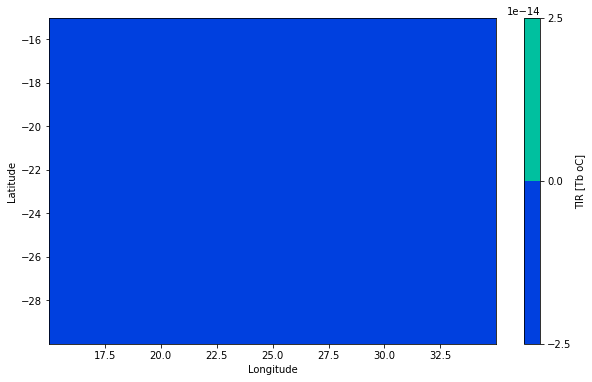

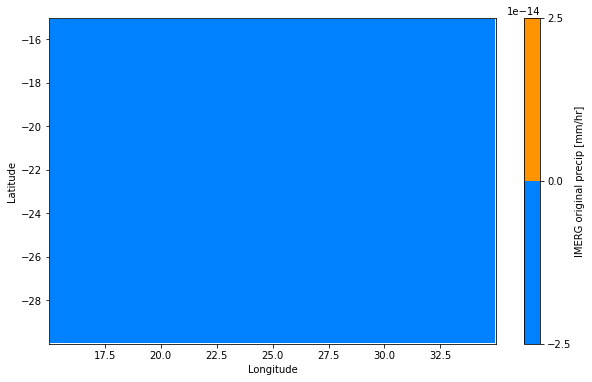

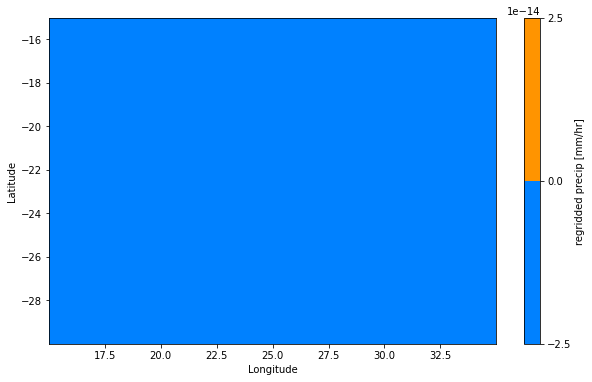

In [80]:
# visualize core data at inherent grid/resol
day = 24*80
plt.figure(figsize=(10,6))
plt.contour(X,Y,cores[:,:,day],cmap='autumn')
plt.contourf(X,Y,tir[:,:,day],cmap='winter')
plt.colorbar(label='TIR [Tb oC]')#plt.contour(X,Y,cores[:,:,22],color='red')
#plt.colorbar(label='power')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim([X[0,0],X[0,-1]])
plt.ylim([Y[0,0],Y[-1,0]])
plt.show()

# visualize core data at inherent grid/resol
plt.figure(figsize=(10,6))
plt.contourf(lon_p,lat_p,precip[:,:,day],cmap='jet')#
plt.colorbar(label='IMERG original precip [mm/hr]')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim([X[0,0],X[0,-1]])
plt.ylim([Y[0,0],Y[-1,0]])
plt.show()

# visualize core data at inherent grid/resol
plt.figure(figsize=(10,6))
plt.contourf(X,Y,regidded_precip[:,:,day],cmap='jet') #regidded_precip
plt.colorbar(label='regridded precip [mm/hr]')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim([X[0,0],X[0,-1]])
plt.ylim([Y[0,0],Y[-1,0]])
plt.show()

In [57]:
# find rainfall pixels collocated with cores
cores_1D = cores.flatten()
precip_1D = regidded_precip.flatten() # cores and precip have same size and indexing - obs in connis notebook
cores_ind_gt_0 = np.where(cores_1D>0)[0]
precip_collocated_w_cores = precip_1D[cores_ind_gt_0] #dat in connis notebook

cores_ind_gt_0
print(precip_collocated_w_cores.shape)
print(np.nanmax(precip_collocated_w_cores))

(375708,)
16.801703342087844


In [70]:
print(np.nanmax(precip_1D))

88.68619829254158


In [58]:
# calculate frequency of rainfall above a threshold 
# dat = 
# threshold = 30mm/hr

def calc_treshReached(dat, thresh):
    return np.sum(np.array(dat)>thresh)/np.sum(np.isfinite(dat))

In [59]:
# calculate frequency of rainfall above a threshold relative to the same frequency for the full rainfall field (native)

def calc_treshReached_vsObs(dat, obs, thresh):
    return np.sum(np.array(dat)>thresh)/np.sum(np.isfinite(dat)) / np.sum(np.array(obs)>thresh)/np.sum(np.isfinite(obs))

In [60]:
# calculate fraction of caught rainfall pixels above a threshold
# calc_treshMissed in connis script

def calc_treshcaught(dat, obs, thresh):
    return np.sum(np.array(dat)>thresh)/np.sum(np.array(obs)>thresh)

In [61]:
# calculate frequency of rainfall above a threshold for regions with wavelet power above a given percentile

def percentile(dat, wav, thresh, perc):
    pval = np.percentile(wav, perc)
    dats = np.array(dat)[np.array(wav)>=pval]
    return np.sum(dats>thresh)/np.sum(np.isfinite(dats))

In [62]:
# fraction of pixels where threshold exceeded
# dat = precip_collocated_w_cores
# obs = precip_1D
thresh = 20
# treached = calc_treshReached(precip_collocated_w_cores,thresh)
# print(treached)

In [63]:
# fraction of caught pixels
# tcaught = calc_treshcaught(precip_collocated_w_cores,precip_1D, thresh)
# print(tcaught)

In [64]:
# fraction of threshold reached in dat vs threshold reached in obs
tfrac = calc_treshReached_vsObs(precip_collocated_w_cores,precip_1D, thresh)
print(tfrac)

0.0


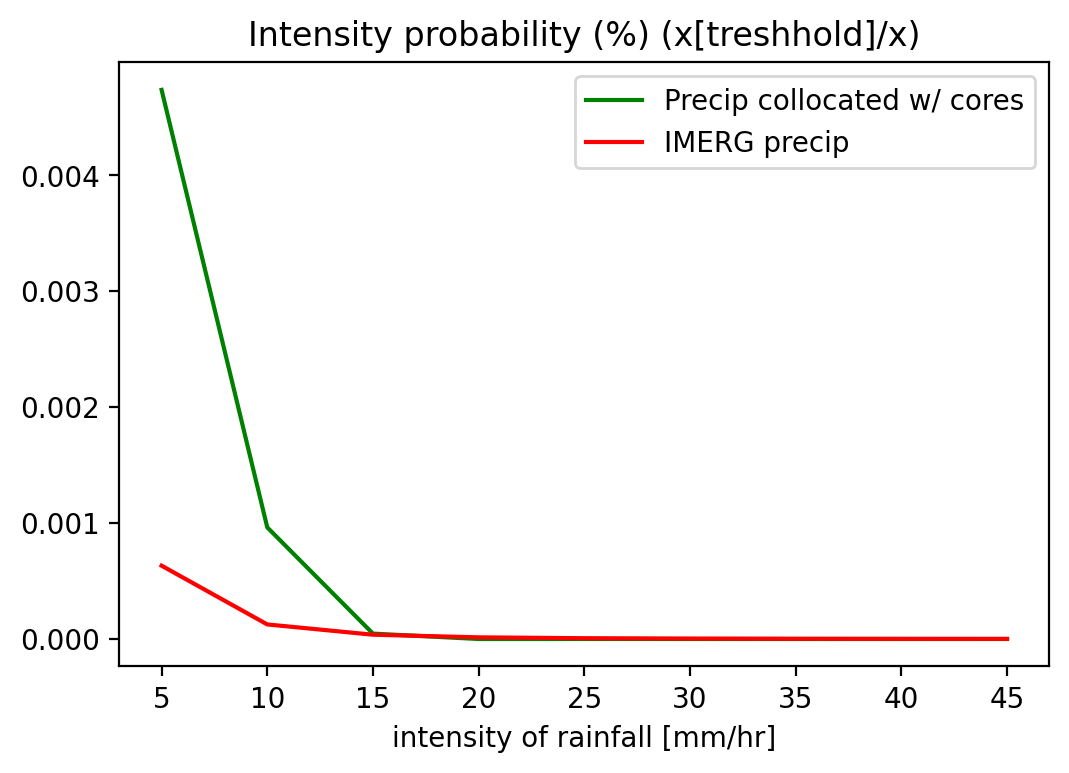

In [65]:
# fraction of rainfall pixels reached above intensity threshold to all rainfall pixels (collocated with cores)
f = plt.figure(figsize=(6,4), dpi=200)
ax = f.add_subplot(111)

treached = []
treached1 = []

for intens in range(5,50,5):   
    cc = calc_treshReached(precip_collocated_w_cores, intens)
    cc1 = calc_treshReached(precip_1D, intens)
    treached.append(cc)
    treached1.append(cc1)

ax.plot(range(5,50,5), treached,color='green',label='Precip collocated w/ cores')
ax.plot(range(5,50,5), treached1,color='red',label='IMERG precip')

ax.set_title("Intensity probability (%) (x[treshhold]/x)")
plt.xlabel('intensity of rainfall [mm/hr]')
plt.legend()

Text(0.5, 0, 'intensity of rainfall [mm/hr]')

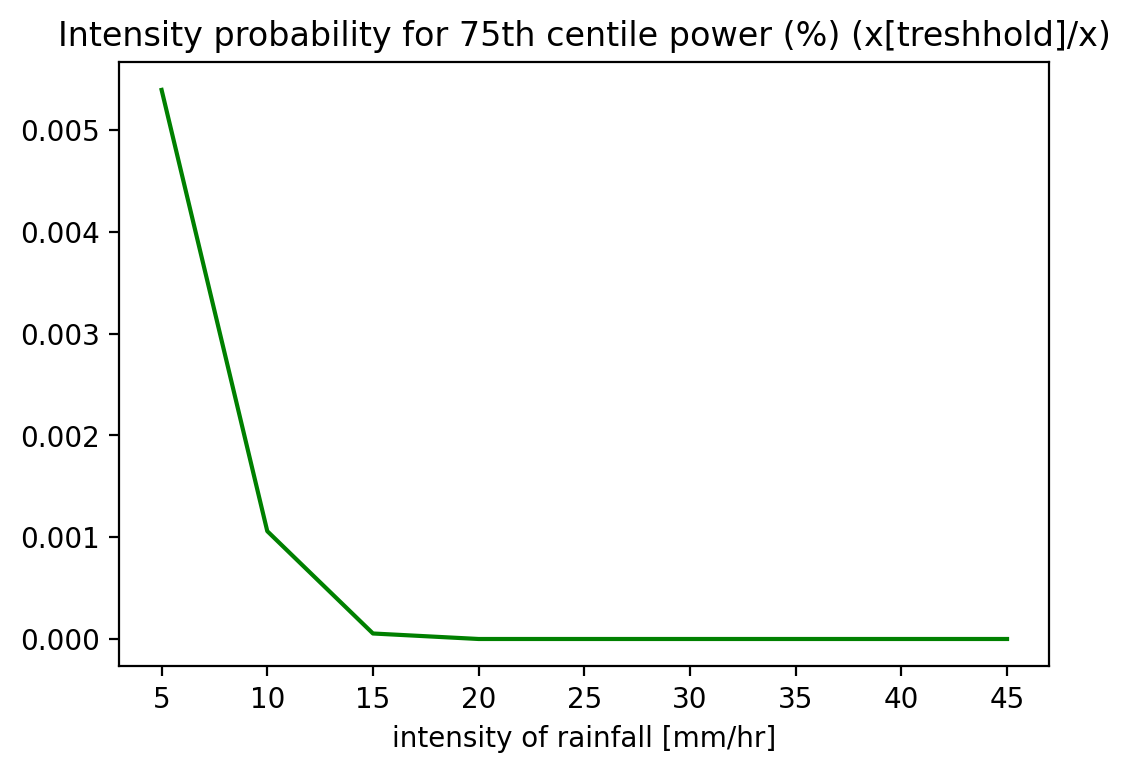

In [66]:
# plot frequency of caught pixels with rainfall above a threshold for regions with wavelet power above a given 
# percentile
f = plt.figure(figsize=(6,4), dpi=200)
ax = f.add_subplot(111)

treached = []
for intens in range(5,50,5):   
    cc = percentile(precip_collocated_w_cores, cores_1D[cores_ind_gt_0], intens, 75)
    treached.append(cc)
    #plotdic.append((treached,dat[1]))
#for pp in plotdic:    
#ax.plot(range(5,50,5), pp[0], label=pp[1])

ax.plot(range(5,50,5), treached,color='green')
ax.set_title("Intensity probability for 75th centile power (%) (x[treshhold]/x)")
plt.xlabel('intensity of rainfall [mm/hr]')
#ax.ylabel('fraction of rainfall pixels caught above intensity threshold that have >= 75th percentile wavelet power')
#plt.legend()
#f.savefig("/home/ck/DIR/cornkle/data/nflics/core_tests/"+'rainP_75p_wpower.jpg')

Text(0.5, 0, 'intensity of rainfall [mm/hr]')

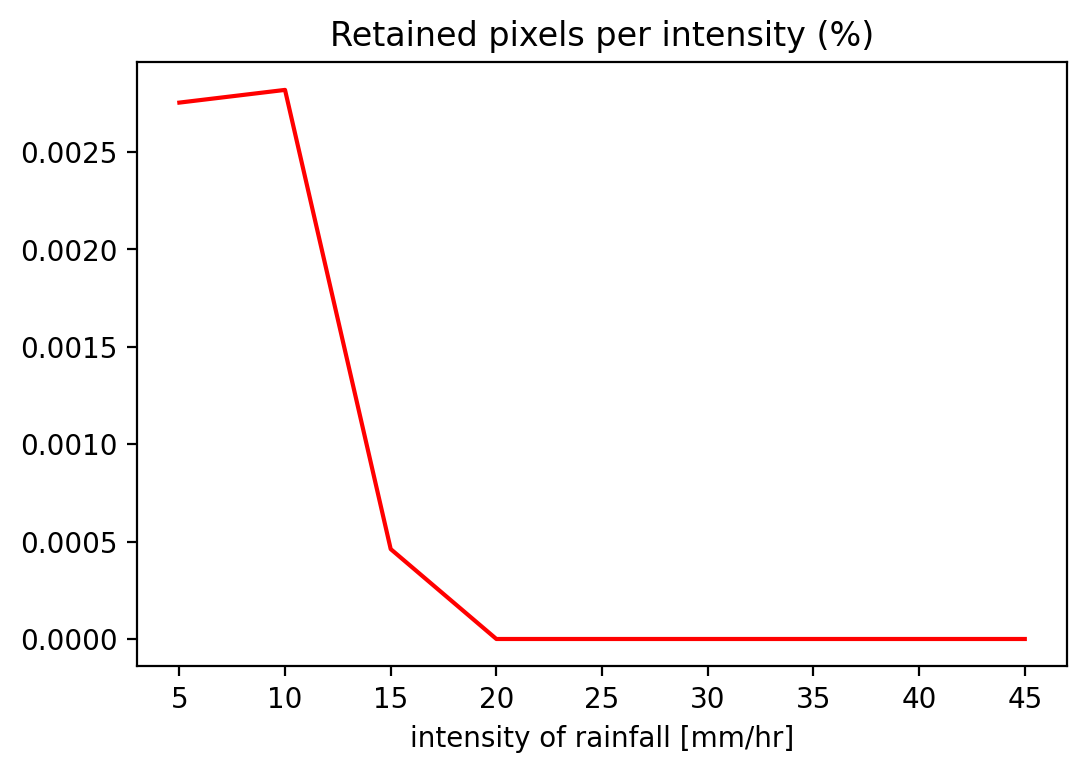

In [67]:
# fraction of rainfall pixels caught above intensity threshold to all caught rainfall pixels
f = plt.figure(figsize=(6,4), dpi=200)
ax = f.add_subplot(111)

tcaught = []
for intens in range(5,50,5):   
    cc = calc_treshcaught(precip_collocated_w_cores, precip_1D, intens)
    tcaught.append(cc)

ax.plot(range(5,50,5), tcaught,color='red')
ax.set_title("Retained pixels per intensity (%)")
plt.xlabel('intensity of rainfall [mm/hr]')
#f.savefig("/home/ck/DIR/cornkle/data/nflics/core_tests/"+'_missedCases_southernAfricaDomain.jpg')   

In [68]:
# read cores daily data
#core_filename = '/prj/Africa_cloud/ch9_wavelet/2010/06/201006081045.nc'
#core_filename = '/prj/Africa_cloud/ch9_wavelet/2010/',month,'/201006081045.nc'
#core_data = nc.Dataset(core_filename,'r')
#print(core_data)
#cores_temp = np.array(core_data.variables['cores'])
#cores = np.array(core_data.variables['cores'])
#time = core_data.variables['time'][:]

#cores = cores.append(cores_temp)
# make a lat x lon x time dataset for monthly cores
#global_attributes = core_data.__dict__


# read precip data
#precip_filename = '/prj/global_water/MCS_Feng/global_v2/2d_fields/'
#precip_data = nc.Dataset(precip_filename,'r')

# visualize core data at inherent grid/resol
#plt.figure(figsize=(10,6))
#plt.contourf(X,Y,np.max(cores,axis=2),cmap='jet')
#plt.colorbar(label='power')
#plt.title(cores.time)
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
#plt.show()

# visualize regridded data
# plt.figure(figsize=(10,6))
#plt.contourf(X_new,Y_new,A,cmap='jet')
#plt.colorbar(label='power')
#plt.title(cores.time)
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
#plt.show()

In [69]:
# replace with precip data grid - bring coarse precip data (0.1) to fine core grid (0.04)
#new_lat = np.linspace(min(lat),max(lat),2000)#(lat[2]-lat[1])*2)
#new_lon = np.linspace(min(lon),max(lon),1900)#(lat[2]-lat[1])*2)
#X_new, Y_new = np.meshgrid(new_lon,new_lat)
#A = regrid_irregular_quick(lat_p,lon_p,lon,lat,cores_temp)
#regidded_precip[:,:,l] = A    